In [2]:
%matplotlib notebook

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import collections

In [4]:
path = './data/ppl_df.pkl'
df = pd.read_pickle(path)

In [5]:
df.head()

,p,ppl,tf
tgt,,,
0,0.000000,1.000000,1
2,-0.705598,2.025057,1
3,-2.818191,16.746529,1
4,-1.158250,3.184355,5584823
5,-1.182970,3.264054,4971506


In [6]:
def downsample(df, n=10000):
    index = np.arange(df.shape[0])
    np.random.shuffle(index)
    index = index[:n]
    index.sort()
    index = df.index[index].astype(np.int)
    return df.loc[index]
    
np.random.seed(1112)
print(df.shape)
df_small = downsample(df)
print(df_small.shape)

df_small.head()

(267736, 3)
(10000, 3)


,p,ppl,tf
tgt,,,
51,-3.491129,32.822971,163454
53,-3.361278,28.826004,156709
92,-3.637545,37.998436,78025
122,-3.866984,47.798004,62267
125,-4.694422,109.335548,61399


<IPython.core.display.Javascript object>


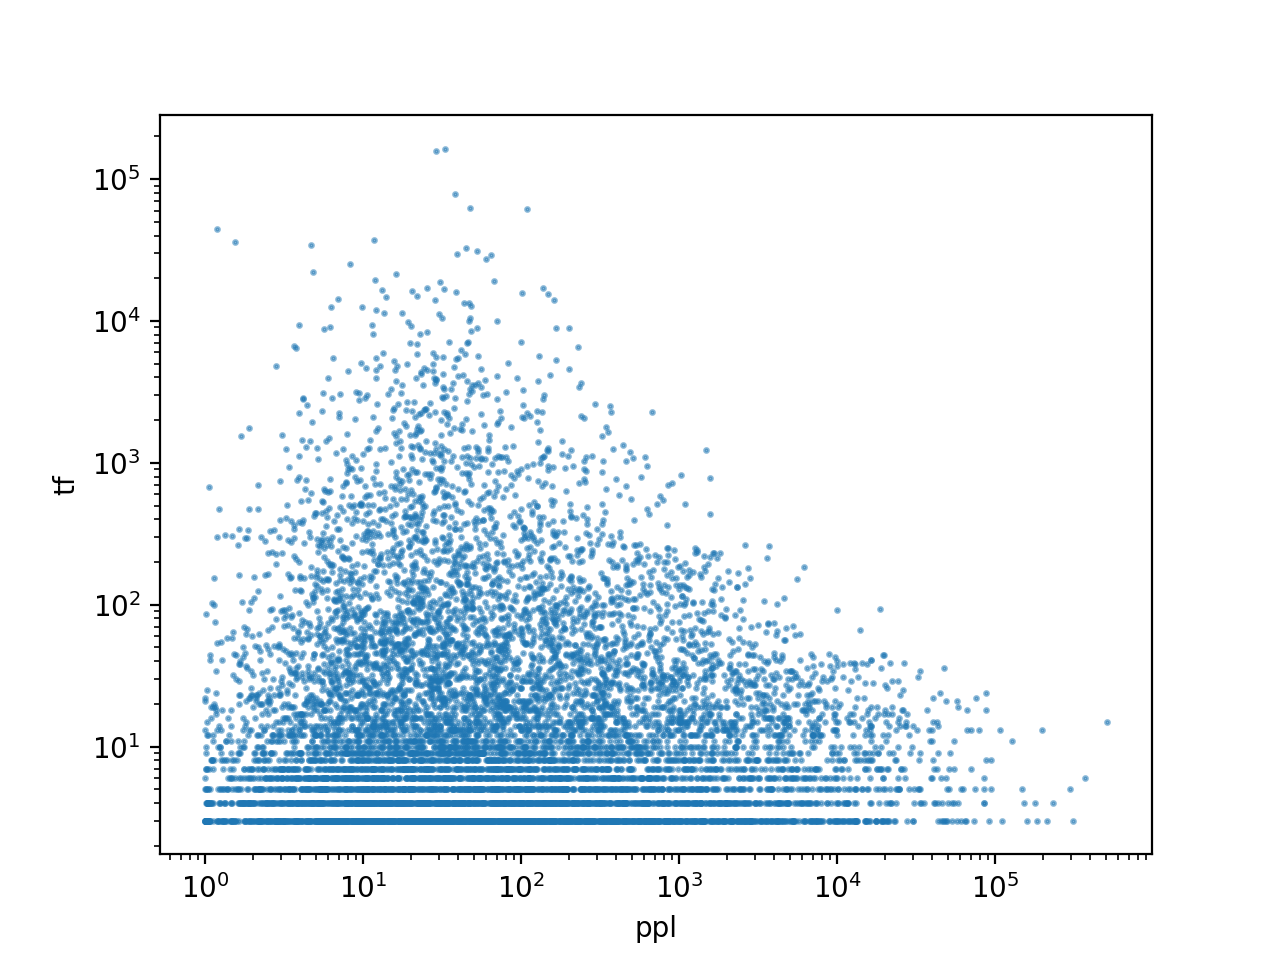

In [7]:



plt.figure()
plt.scatter(df_small['ppl'], df_small['tf'], s=2, alpha=0.5)
plt.xlabel('ppl')
plt.ylabel('tf')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
ppl = df_small['ppl'].to_numpy()
tf = df_small['tf'].to_numpy()

print(ppl.shape, tf.shape)

index = tf.argsort()[::-1]

xs = np.arange(len(index))
tf = tf[index]
ppl = ppl[index]

fig, ax1 = plt.subplots()



color = 'tab:red'
ax1.set_ylabel('Term Frequency', color=color)
ax1.scatter(xs, tf, color=color, s=2, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_zorder(2)
ax1.patch.set_visible(False)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Perplexity', color=color)
ax2.scatter(xs, ppl, color=color, s=1, alpha=1)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.set_zorder(1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# plt.figure()
# plt.scatter(xs, tf, s=2, alpha=0.5)
# # plt.xlabel('ppl')
# # plt.ylabel('tf')
# plt.yscale('log')
# # plt.xscale('log')
# plt.tight_layout()
# plt.show()

# plt.figure()
# plt.scatter(xs, ppl, s=2, alpha=0.5)
# plt.yscale('log')
# plt.tight_layout()
# plt.show()

In [49]:
def read_tradeoff(path):
    out = collections.defaultdict(list)
    with open(path) as f:
        for i, line in enumerate(f):
            if i == 0:
                keys = line.strip().split()
                continue
            vals = line.strip().split()
            for k, v in zip(keys, vals):
                out[k].append(v)
        out['k'] = np.asarray([int(x) for x in out['k']])
        out['lim'] = np.asarray([int(x) for x in out['lim']])
        out['coeff'] = np.asarray([float(x) for x in out['coeff']])
        out['ppl'] = np.asarray([float(x) for x in out['ppl']])
    return out
path = './data/coeff_lim_tradeoff.txt'
tradeoff_data = read_tradeoff(path)

In [50]:
coeff, lim, ppl = [tradeoff_data[k] for k in ['coeff', 'lim', 'ppl']]
idx = ppl.argmin()
print(lim[idx], coeff[idx], ppl[idx])

4 0.6 9.035139083862305


<IPython.core.display.Javascript object>


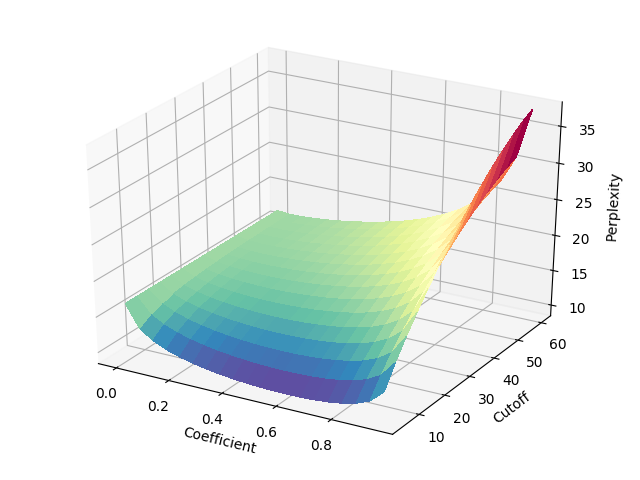

In [51]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = tradeoff_data['coeff'].reshape(15, -1)
Y = tradeoff_data['lim'].reshape(15, -1)
Z = tradeoff_data['ppl'].reshape(15, -1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral_r,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Coefficient')
ax.set_ylabel('Cutoff')
ax.set_zlabel('Perplexity')

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()
plt.savefig('perplexity_3d.pdf', dpi=300)

In [52]:
def read_tradeoff(path):
    out = collections.defaultdict(list)
    with open(path) as f:
        for i, line in enumerate(f):
            if i == 0:
                keys = line.strip().split()
                continue
            vals = line.strip().split()
            for k, v in zip(keys, vals):
                out[k].append(v)
        out['k'] = np.asarray([int(x) for x in out['k']])
        out['lim'] = np.asarray([int(x) for x in out['lim']])
        out['coeff'] = np.asarray([float(x) for x in out['coeff']])
        out['ppl'] = np.asarray([float(x) for x in out['ppl']])
    return out
path = './data/coeff_lim_tradeoff-original.txt'
tradeoff_data = read_tradeoff(path)

In [53]:
coeff, lim, ppl = [tradeoff_data[k] for k in ['coeff', 'lim', 'ppl']]
idx = ppl.argmin()
print(lim[idx], coeff[idx], ppl[idx])

4 0.05 16.365741729736328


<IPython.core.display.Javascript object>


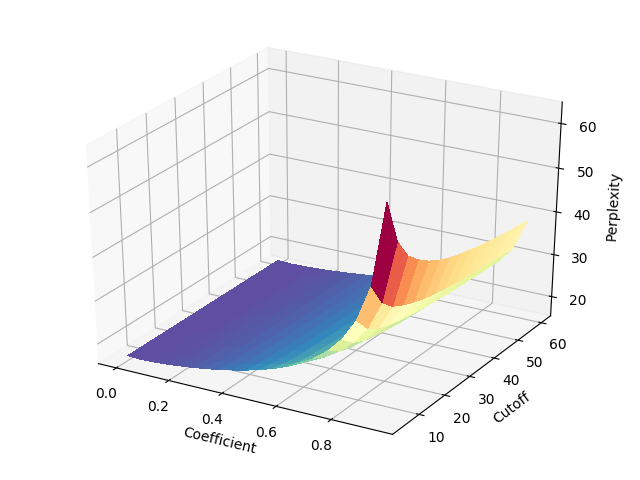

In [54]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = tradeoff_data['coeff'].reshape(15, -1)
Y = tradeoff_data['lim'].reshape(15, -1)
Z = tradeoff_data['ppl'].reshape(15, -1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral_r,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Coefficient')
ax.set_ylabel('Cutoff')
ax.set_zlabel('Perplexity')

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()
plt.savefig('perplexity_3d.pdf', dpi=300)

In [ ]:
Z.shape